# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [93]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [94]:
coordinates = list(lat_lngs)
coordinates

[(41.85224217474412, 109.72431833027355),
 (-51.27662272646039, -87.110104419375),
 (-18.082496106138663, 43.99301886870516),
 (37.936153732154395, -12.51977860029228),
 (16.200284256780527, -112.97346838078315),
 (27.036236753055142, -131.25363647995442),
 (-37.653482643460045, -29.89557850716058),
 (-53.390085822355275, 55.188155113806154),
 (-22.405912428787403, 133.4701494868666),
 (22.73952416954148, -82.09533854095544),
 (-72.00173126119675, 146.17771376024956),
 (-73.73274261624739, 74.16051695178125),
 (-33.39568176681052, -152.51259941776743),
 (-39.79927970188206, -107.48402213781165),
 (42.838427185667626, 90.00116213750947),
 (16.233281044935495, -27.840801494768208),
 (52.80644845748421, -161.41828000971657),
 (18.94203683887608, 12.638851600379555),
 (79.24483947081724, -46.58570858855618),
 (-76.71327394929645, -108.65203957655972),
 (64.90707987876625, -19.713404918401814),
 (-27.698429440033873, -24.859841438062894),
 (78.62486783869335, 11.498719443009552),
 (-82.7160

In [95]:
# Empty list for holding the cities names
cities = []

# Identify nearest city for each lat, lng combination
for coord in coordinates:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 585


In [103]:
#Test print list of cities
print(f"List of Cities: {cities}\n")

List of Cities: ['shiguai', 'puerto natales', 'maintirano', 'cascais', 'cabo san lucas', 'lompoc', 'edinburgh of the seven seas', 'port-aux-francais', 'alice springs', 'guines', 'blackmans bay', 'avarua', 'adamstown', 'turpan', 'porto novo', 'bethel', 'nguigmi', 'ilulissat', 'saudarkrokur', 'longyearbyen', 'grytviken', 'puerto san carlos', 'ribeira grande', 'ust-nera', 'waitangi', 'hillvue', 'invercargill', 'weno', 'enewetak', 'nemuro', 'tralee', 'chania', 'ceiba', 'vingt cinq', 'kataragama', 'rongelap', 'anadyr', 'sitka', 'phetchabun', 'ushuaia', 'schlusselfeld', "kotel'nikovo", 'east london', 'kushtia', 'chengde', 'newman', 'howard springs', 'taiohae', 'tsiombe', 'port moresby', 'niwai', 'port mathurin', 'rabo de peixe', 'noshiro', 'mujiayingzi', 'ivankiv', 'sanchursk', 'punta arenas', 'san jose village', 'moussoro', 'udachny', 'hirara', 'sinabang', 'qaqortoq', 'hasaki', 'nizhniy odes', 'island harbour', 'bikenibeu village', 'constantia', 'san rafael', 'fomboni', 'xiva', 'gadzhiyevo'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [97]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

#Testing the API from openweathermap url by retriving sample data to verify if it works
test_city_url = url + "&q=" + "Cleveland"
test_city_weather = requests.get(test_city_url).json()
print(test_city_weather)

{'coord': {'lon': -81.6954, 'lat': 41.4995}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 42.64, 'feels_like': 34.9, 'temp_min': 40.6, 'temp_max': 45.07, 'pressure': 1016, 'humidity': 86}, 'visibility': 9656, 'wind': {'speed': 16.11, 'deg': 310, 'gust': 20.71}, 'clouds': {'all': 100}, 'dt': 1698698114, 'sys': {'type': 2, 'id': 2074933, 'country': 'US', 'sunrise': 1698666942, 'sunset': 1698704701}, 'timezone': -14400, 'id': 5150529, 'name': 'Cleveland', 'cod': 200}


In [113]:
#import date time module for UTC to ISO date conversion 
from datetime import datetime

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #converting to ISO Standard timeframe
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shiguai
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | maintirano
Processing Record 4 of Set 1 | cascais
Processing Record 5 of Set 1 | cabo san lucas
Processing Record 6 of Set 1 | lompoc
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | alice springs
Processing Record 10 of Set 1 | guines
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | turpan
Processing Record 15 of Set 1 | porto novo
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | nguigmi
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | saudarkrokur
Processing Record 20 of Set 1 | longyearbyen
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | puer

Processing Record 40 of Set 4 | lorengau
Processing Record 41 of Set 4 | tibati
Processing Record 42 of Set 4 | nikolayevsk-on-amure
Processing Record 43 of Set 4 | lebu
Processing Record 44 of Set 4 | tual
Processing Record 45 of Set 4 | jayapura
Processing Record 46 of Set 4 | n'zeto
Processing Record 47 of Set 4 | el calafate
Processing Record 48 of Set 4 | leksand
Processing Record 49 of Set 4 | poltavka
Processing Record 50 of Set 4 | mana
Processing Record 1 of Set 5 | tura
Processing Record 2 of Set 5 | son ferrer
City not found. Skipping...
Processing Record 3 of Set 5 | arauco
Processing Record 4 of Set 5 | saldanha
Processing Record 5 of Set 5 | queenstown
Processing Record 6 of Set 5 | arnedo
Processing Record 7 of Set 5 | durg
Processing Record 8 of Set 5 | atafu village
Processing Record 9 of Set 5 | bozoum
Processing Record 10 of Set 5 | macapa
Processing Record 11 of Set 5 | keflavik
Processing Record 12 of Set 5 | nar'yan-mar
Processing Record 13 of Set 5 | uaua
Process

Processing Record 38 of Set 8 | san antonio
Processing Record 39 of Set 8 | janoshalma
Processing Record 40 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 41 of Set 8 | xuchang
Processing Record 42 of Set 8 | tofol
Processing Record 43 of Set 8 | kolonia
Processing Record 44 of Set 8 | kerikeri
Processing Record 45 of Set 8 | georgetown
Processing Record 46 of Set 8 | greymouth
Processing Record 47 of Set 8 | quiberon
Processing Record 48 of Set 8 | altai
Processing Record 49 of Set 8 | kisangani
Processing Record 50 of Set 8 | ocean shores
Processing Record 1 of Set 9 | verkhovazh'ye
Processing Record 2 of Set 9 | papao
Processing Record 3 of Set 9 | kavalerovo
Processing Record 4 of Set 9 | otjiwarongo
Processing Record 5 of Set 9 | minas de marcona
Processing Record 6 of Set 9 | nchelenge
Processing Record 7 of Set 9 | pazaryolu
Processing Record 8 of Set 9 | whangarei
Processing Record 9 of Set 9 | noosa heads
Processing Record 10 of Set 9 | dudinka
Processing 

Processing Record 27 of Set 12 | williams lake
Processing Record 28 of Set 12 | villa gesell
Processing Record 29 of Set 12 | villajoyosa
Processing Record 30 of Set 12 | aripuana
Processing Record 31 of Set 12 | fiambala
Processing Record 32 of Set 12 | malyye derbety
Processing Record 33 of Set 12 | ouadda
Processing Record 34 of Set 12 | diboll
Processing Record 35 of Set 12 | santiago de cao
-----------------------------
Data Retrieval Complete      
-----------------------------


In [125]:
# Testing to determine if the date was converted to ISO format from UTC 
city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
city_date

'2023-10-30 21:16:18'

In [126]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Cound
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [127]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shiguai,40.7058,110.2856,47.30,40,29,5.19,CN,2023-10-30 21:14:31
1,Puerto Natales,-51.7236,-72.4875,44.80,49,96,5.26,CL,2023-10-30 21:14:32
2,Maintirano,-18.0667,44.0167,78.08,73,8,13.96,MG,2023-10-30 21:09:32
3,Cascais,38.6979,-9.4215,62.06,80,100,11.99,PT,2023-10-30 21:12:14
4,Cabo San Lucas,22.8909,-109.9124,89.62,68,40,9.22,MX,2023-10-30 21:12:00


In [128]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [129]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Shiguai,40.7058,110.2856,47.30,40,29,5.19,CN,2023-10-30 21:14:31
1,Puerto Natales,-51.7236,-72.4875,44.80,49,96,5.26,CL,2023-10-30 21:14:32
2,Maintirano,-18.0667,44.0167,78.08,73,8,13.96,MG,2023-10-30 21:09:32
3,Cascais,38.6979,-9.4215,62.06,80,100,11.99,PT,2023-10-30 21:12:14
4,Cabo San Lucas,22.8909,-109.9124,89.62,68,40,9.22,MX,2023-10-30 21:12:00


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [131]:
#extracting Latitudes, Temps, Humidity, Cloudiness, Wind Speed
plt_lat = city_data_df["Lat"]
plt_temp = city_data_df["Max Temp"]
plt_humid = city_data_df["Humidity"]
plt_cloud = city_data_df["Cloudiness"]
plt_wind = city_data_df["Wind Speed"]

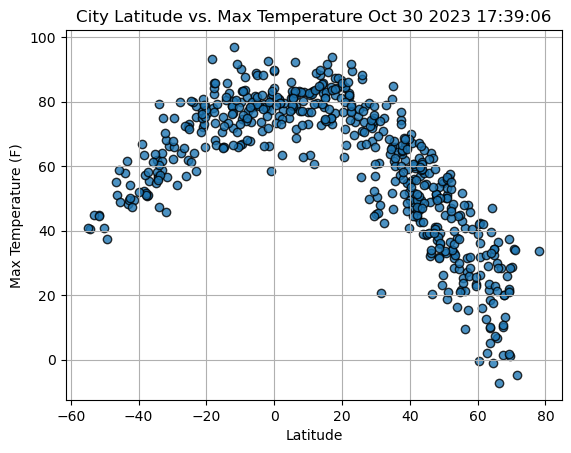

In [132]:
# Build scatter plot for Latitude vs. Temperature
plt.scatter(plt_lat, plt_temp,edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%b %d %Y %H:%M:%S"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

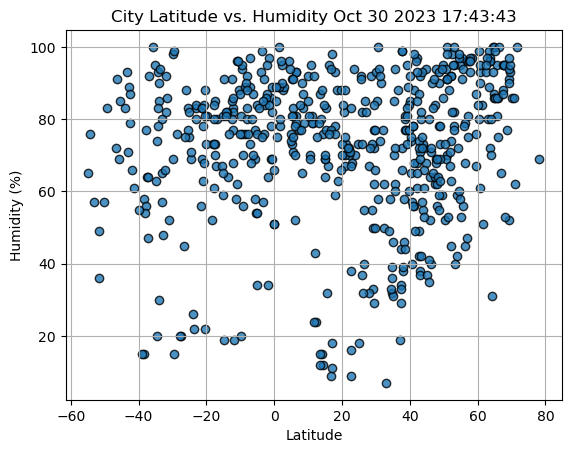

In [133]:
# Build scatter plot for Latitude vs. Humidity
plt.scatter(plt_lat, plt_humid, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity" + time.strftime("%b %d %Y %H:%M:%S"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

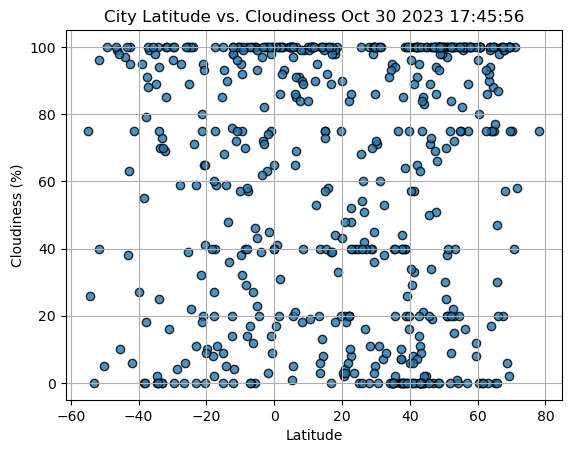

In [134]:
# Build scatter plot for Latitude vs. Cloudiness
plt.scatter(plt_lat, plt_cloud, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness" + time.strftime("%b %d %Y %H:%M:%S"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

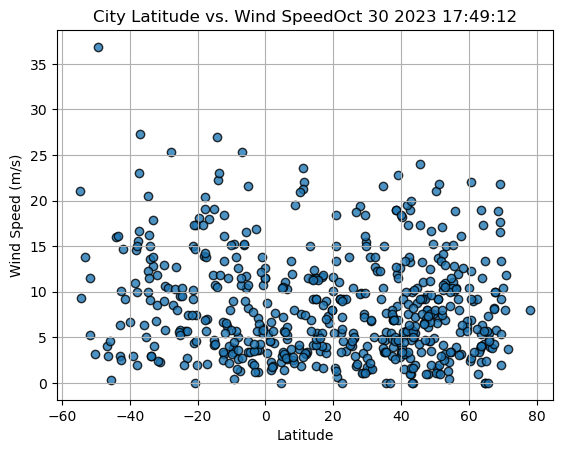

In [135]:
# Build scatter plot for Latitude vs. Wind Speed
plt.scatter(plt_lat, plt_wind, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%b %d %Y %H:%M:%S"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [138]:
# Define a function to create Linear Regression plots
def linear_regress_function(x_values, y_values, title, y_label, text_coordinates):
    #Executes Regression on the weather data based on the hemispheric location
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [139]:
test_index = city_data_df.loc[50]
test_index

City                  Mujiayingzi
Lat                       42.1167
Lng                      118.7833
Max Temp                    46.06
Humidity                       68
Cloudiness                     65
Wind Speed                   7.52
Country                        CN
Date          2023-10-30 21:14:41
Name: 50, dtype: object

In [140]:
lat_test = city_data_df["Lat"] >= 0
lat_test

City_ID
0       True
1      False
2      False
3       True
4       True
       ...  
560    False
561     True
562     True
563     True
564    False
Name: Lat, Length: 565, dtype: bool

In [141]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Shiguai,40.7058,110.2856,47.30,40,29,5.19,CN,2023-10-30 21:14:31
3,Cascais,38.6979,-9.4215,62.06,80,100,11.99,PT,2023-10-30 21:12:14
4,Cabo San Lucas,22.8909,-109.9124,89.62,68,40,9.22,MX,2023-10-30 21:12:00
5,Lompoc,34.6391,-120.4579,80.78,32,0,10.36,US,2023-10-30 21:14:32
9,Guines,50.8671,1.8703,50.94,91,100,13.65,FR,2023-10-30 21:14:32


In [142]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Puerto Natales,-51.7236,-72.4875,44.80,49,96,5.26,CL,2023-10-30 21:14:32
2,Maintirano,-18.0667,44.0167,78.08,73,8,13.96,MG,2023-10-30 21:09:32
6,Edinburgh Of The Seven Seas,-37.0676,-12.3116,55.29,92,99,27.27,SH,2023-10-30 21:11:36
7,Port-Aux-Francais,-49.3500,70.2167,37.45,83,100,36.86,TF,2023-10-30 21:14:06
8,Alice Springs,-23.7000,133.8833,63.95,22,71,5.75,AU,2023-10-30 21:14:32


###  Temperature vs. Latitude Linear Regression Plot

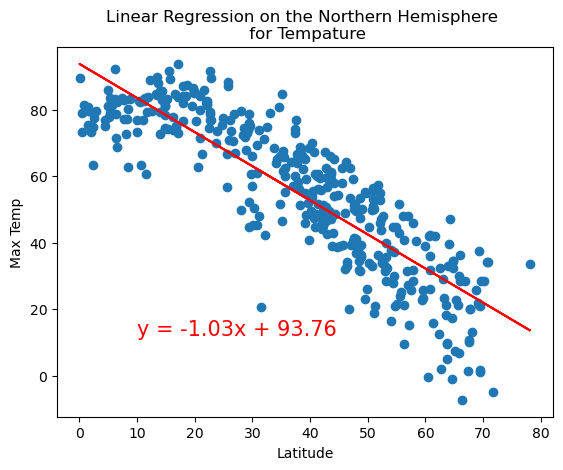

In [173]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Calling function linear_regress_function

linear_regress_function(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Tempature', 'Max Temp',(10,12))

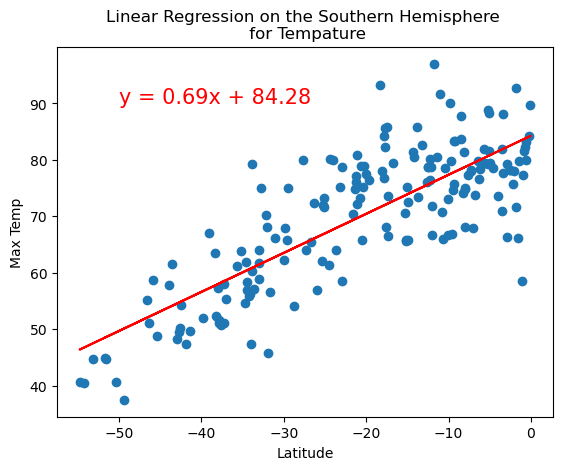

In [174]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regress_function(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Tempature', 'Max Temp',(-50,90))

**Discussion about the linear relationship:** 

Comparing the northern and southern hemispheres shows an tempature difference whereas the northern hemisphere latitude that is greater than 0 shows an decrease in tempatures whereas the southern hemisphere shows increase tempature

### Humidity vs. Latitude Linear Regression Plot

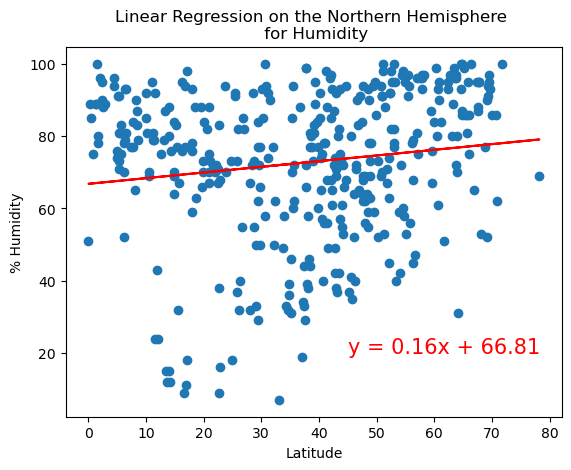

In [175]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

linear_regress_function(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Humidity', '% Humidity',(45,20))

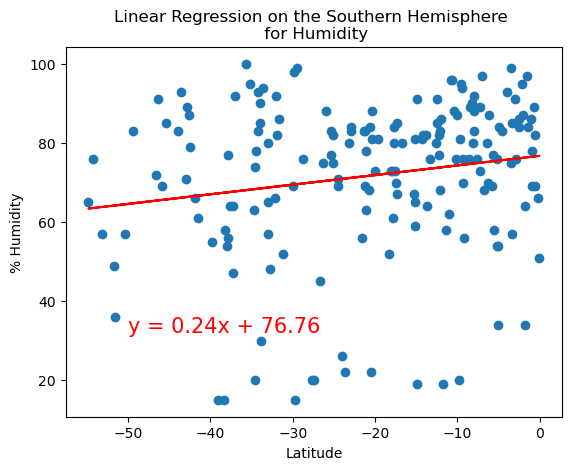

In [176]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

linear_regress_function(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Humidity', '% Humidity',(-50,32))

**Discussion about the linear relationship:** Concluding the comparison for Humidity between northern and southern hemisphere shows that humidity in northern hemisphere is slightly higher than the southern hemisphere and noted that higher the latitude the humidity increases 

### Cloudiness vs. Latitude Linear Regression Plot

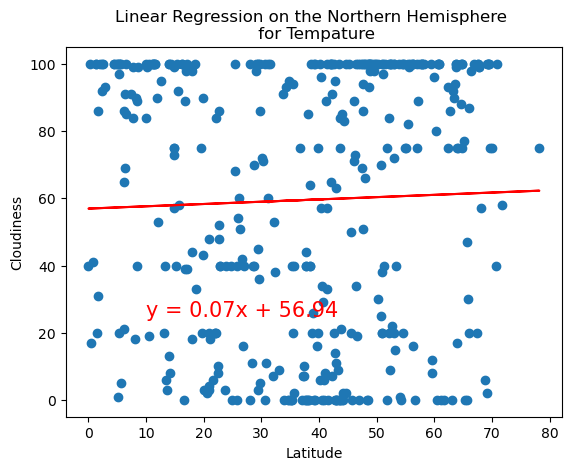

In [177]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

linear_regress_function(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Tempature', 'Cloudiness',(10,25))

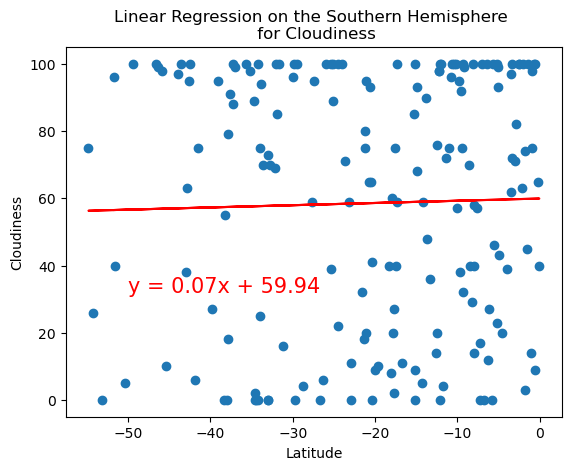

In [178]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regress_function(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Cloudiness', 'Cloudiness',(-50,32))

**Discussion about the linear relationship:** The Northern Hemisphere shows an cluster of clouds for higher laditude, while the southern hemisphere shows less clouds within that southern region

### Wind Speed vs. Latitude Linear Regression Plot

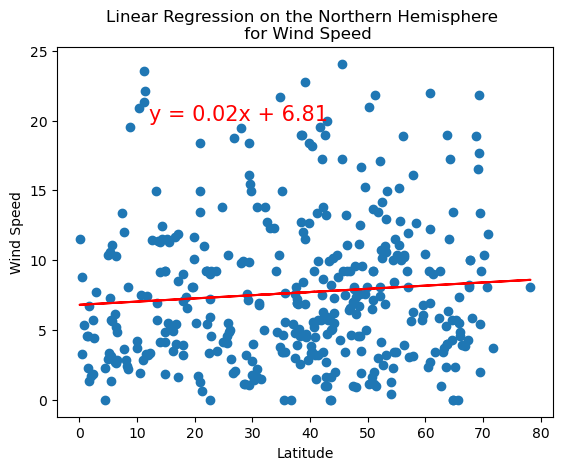

In [179]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

linear_regress_function(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(12,20))

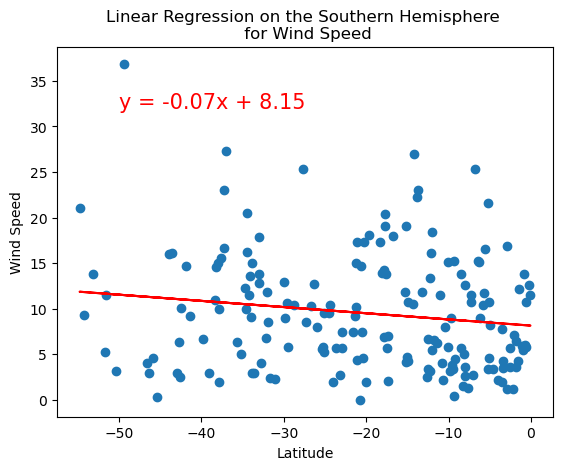

In [180]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regress_function(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,32))

**Discussion about the linear relationship:** The wind speed shows that the northern hemisphere with increase wind speed as the latitude increases while the southern hemisphere shows steady decrease in Wind Speeds